# Знаковые графы

## Малый граф

Необходимо определить, сбалансирован ли граф.   
Входные данные:  
|V| = 15 
|E| = 20  
Знаки + и -  
(Визуализировать циклы)  

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
V = 15
E = 20

In [3]:
def get_labels(G):
    values = []
    for v in range(len(G.edges())):
        sign = list(G.edges.data())[v][2]["sign"]
        str_sign = '+' if sign > 0 else '-'
        values.append(str_sign)
    labels = dict(zip(G.edges(), values))
    return labels

In [4]:
def create_signed_graph(V, E):
    G = nx.gnm_random_graph(V, E)
    subgraphs = list(nx.connected_components(G))
    for part in subgraphs[1:]:
        G.add_edge(list(subgraphs[0])[0], list(part)[0])
    marks = [1, -1]
    G_edges = list(G.edges())

    for edge in G_edges:
        G[edge[0]][edge[1]]['sign'] = random.choice(list(marks))
        
    return G
        

def draw_graph(G, pos):
    plt.figure(figsize = (16, 16))
    nx.draw_networkx(G, pos, node_color = 'green', node_size=500)
    labels = get_labels(G)
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels,  
                                 font_size=15, font_color="blue")
    plt.show()


In [5]:
def draw_cycles(G, pos, color_map):
    plt.figure(figsize = (10, 10))
    nx.draw(G, pos=pos, node_color=color_map, node_size=500, with_labels=True)
    labels = get_labels(G)
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels,  
                                     font_size=23, font_color="blue")
    plt.show()

def find_balanced_or_not(G, pos):
    balance = []
    for cycle in nx.cycle_basis(G):
        sign = 1
        for node in range(len(cycle)-1):
            sign *= G[cycle[node]][cycle[node + 1]]['sign']
        balance.append(sign)

    for num, cycle in enumerate(nx.cycle_basis(G)):
        sign = 1
        for node in range(len(cycle)-1):
            sign *= G[cycle[node]][cycle[node + 1]]['sign']
        balance.append(sign)
        str_sign = '+' if sign > 0 else '-'
        print(f'цикл {num + 1}, знак: {str_sign}')
        color_map = []
        for node in G:
            if node in cycle:
                color_map.append('yellow')
            else: 
                color_map.append('green')   
        draw_cycles(G, pos, color_map)

    if -1 in balance:
        print('\n*******\nГраф несбалансирован\n*******')
    else:
        print('\n*******\nГраф сбалансирован\n*******')

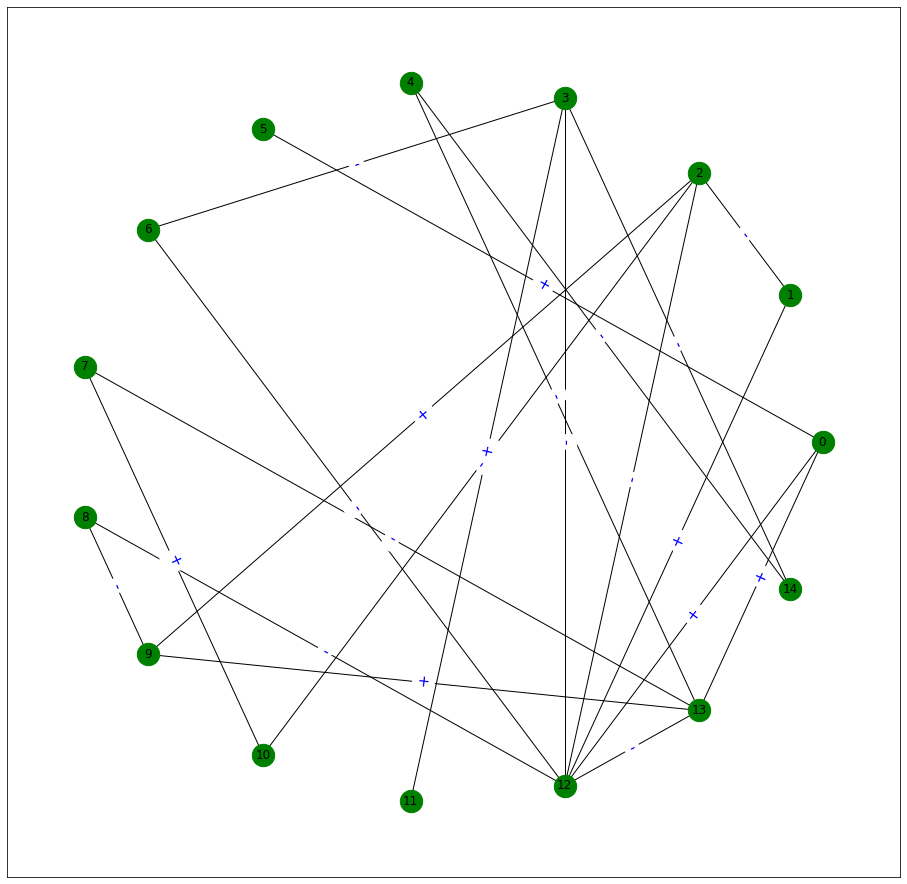

In [6]:
G = create_signed_graph(V, E)
pos = nx.circular_layout(G)
draw_graph(G, pos)

цикл 1, знак: -


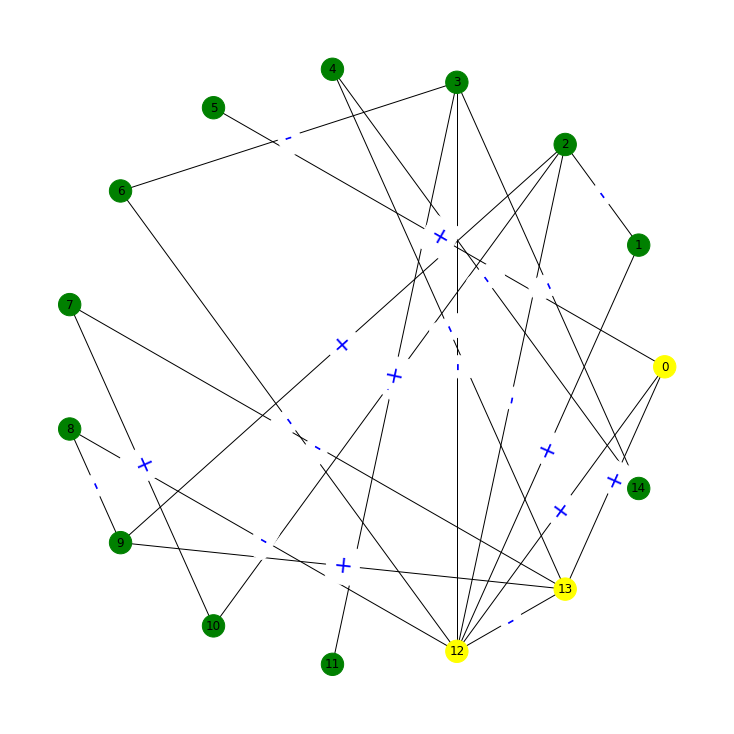

цикл 2, знак: +


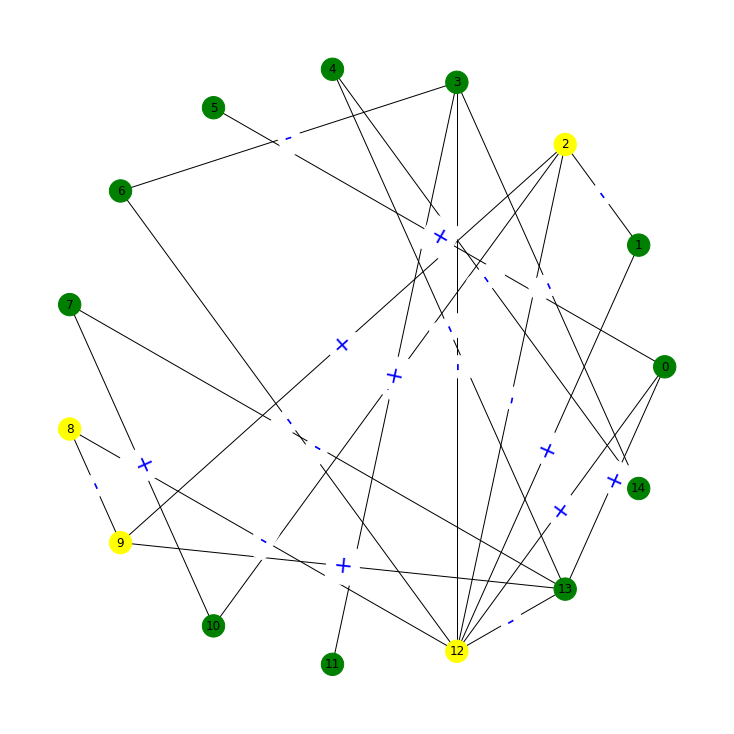

цикл 3, знак: +


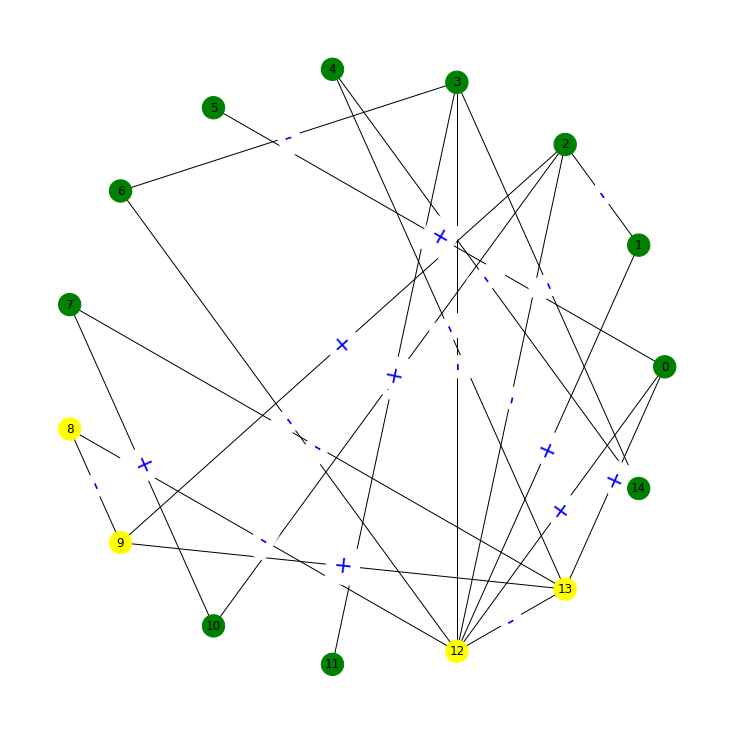

цикл 4, знак: +


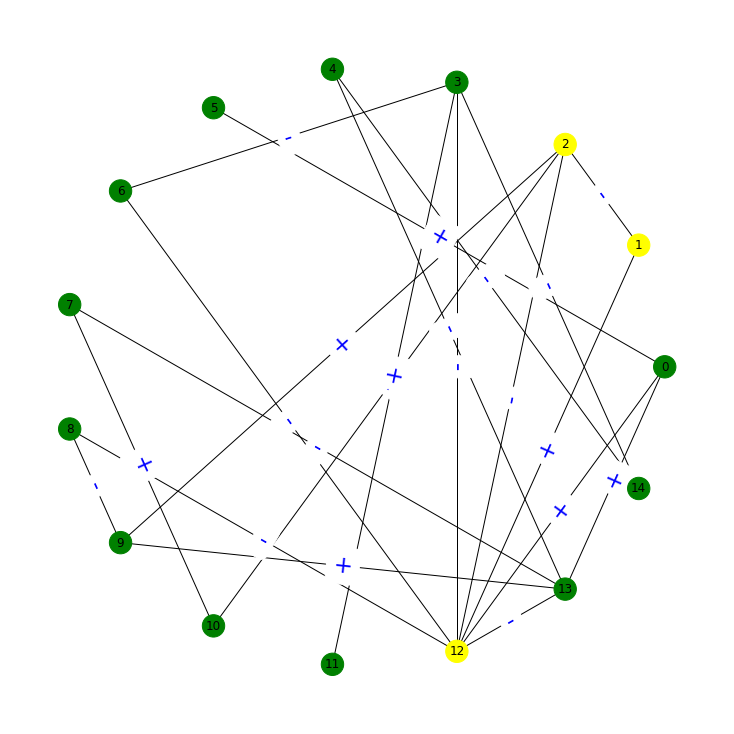

цикл 5, знак: -


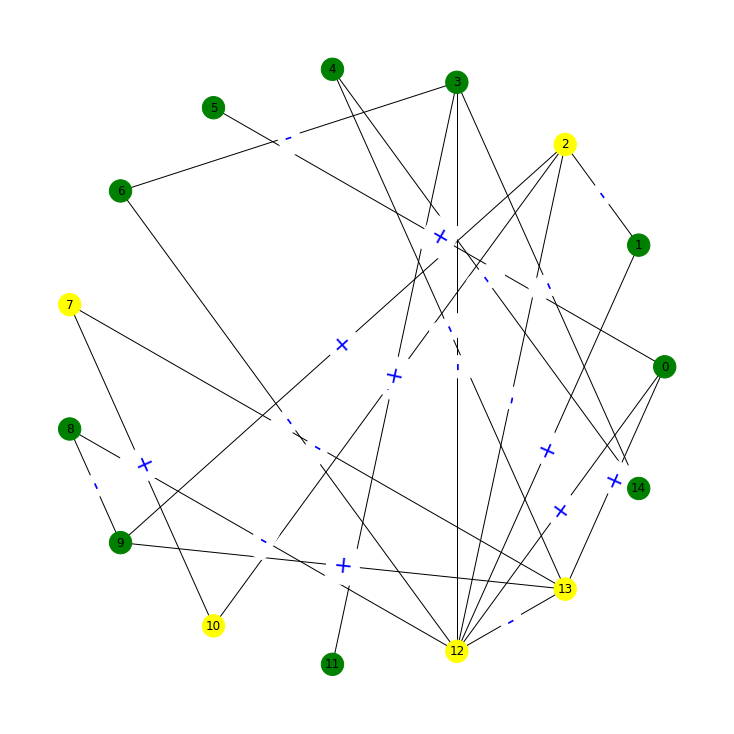

цикл 6, знак: +


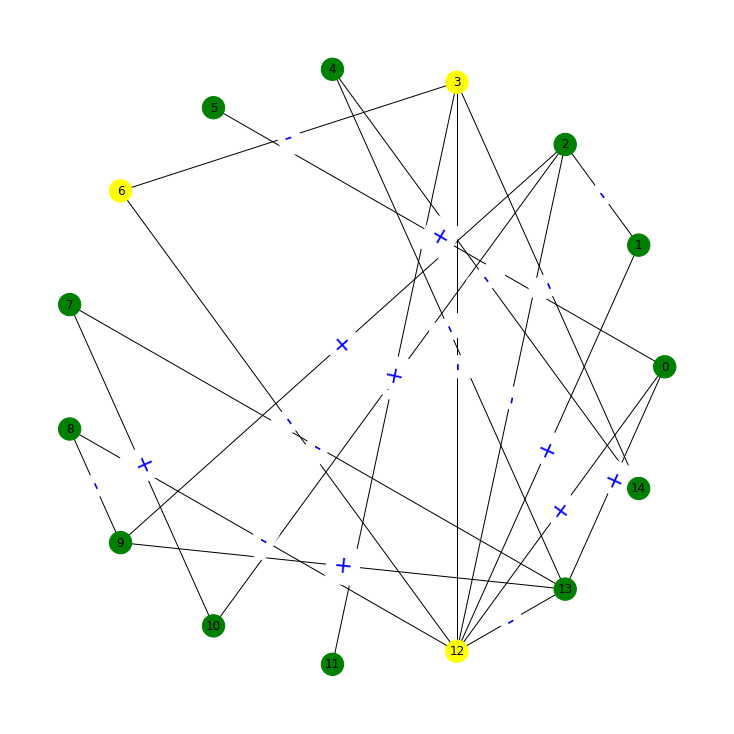

цикл 7, знак: +


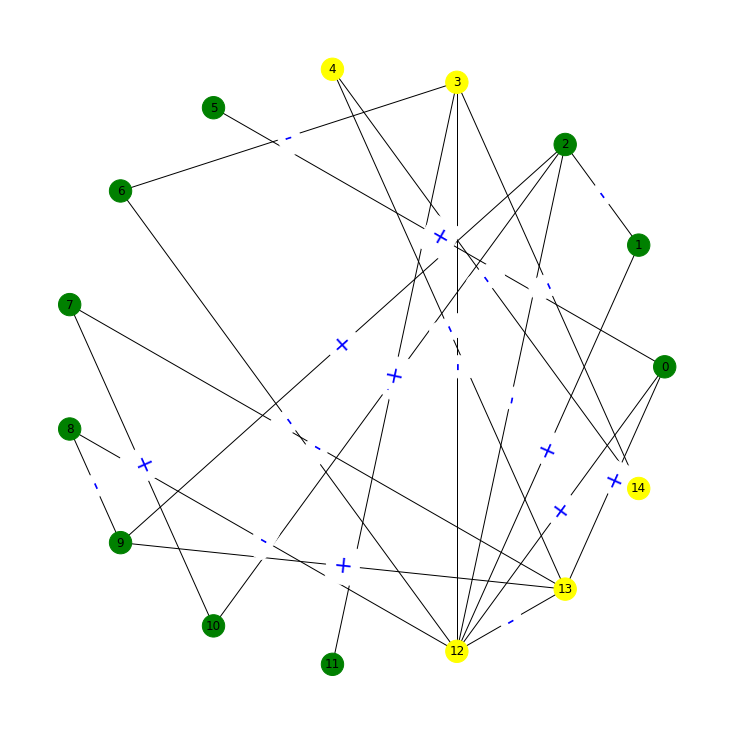


*******
Граф несбалансирован
*******


In [7]:
find_balanced_or_not(G, pos)

## Большой граф

Необходимо определить, сбалансирован ли граф.   
Входные данные:  
|V| = 100  
Знаки + и -  

In [15]:
V = 100
E = 150

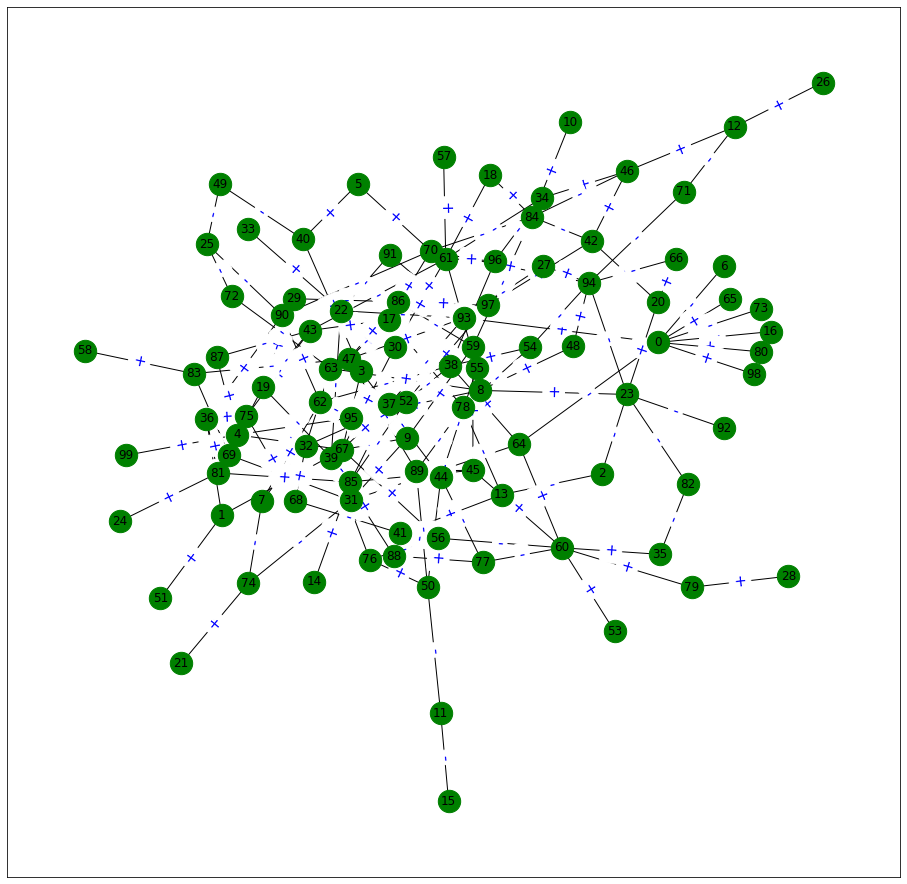

In [16]:
G = create_signed_graph(V, E)
pos = nx.spring_layout(G)
draw_graph(G,pos)

In [17]:
balance = []
for cycle in nx.cycle_basis(G):
    sign = 1
    for node in range(len(cycle)-1):
        sign *= G[cycle[node]][cycle[node + 1]]['sign']
    balance.append(sign)

print(f'цикл | знак')
for num, cycle in enumerate(nx.cycle_basis(G)):
    sign = 1
    for node in range(len(cycle)-1):
        sign *= G[cycle[node]][cycle[node + 1]]['sign']
    balance.append(sign)
    str_sign = '+' if sign > 0 else '-'
    print(" %s  |  %s" % (str(num + 1).rjust(2, " "), str_sign.rjust(2, " ")))
    
if -1 in balance:
    print('\n*******\nГраф несбалансирован\n*******')
else:
    print('\n*******\nГраф сбалансирован\n*******')

цикл | знак
  1  |   -
  2  |   +
  3  |   -
  4  |   -
  5  |   +
  6  |   +
  7  |   +
  8  |   +
  9  |   +
 10  |   -
 11  |   +
 12  |   -
 13  |   +
 14  |   -
 15  |   -
 16  |   -
 17  |   +
 18  |   -
 19  |   -
 20  |   -
 21  |   -
 22  |   -
 23  |   +
 24  |   -
 25  |   +
 26  |   +
 27  |   -
 28  |   +
 29  |   +
 30  |   +
 31  |   +
 32  |   -
 33  |   +
 34  |   -
 35  |   -
 36  |   +
 37  |   -
 38  |   -
 39  |   +
 40  |   -
 41  |   +
 42  |   -
 43  |   +
 44  |   -
 45  |   -
 46  |   +
 47  |   -
 48  |   +
 49  |   -
 50  |   -
 51  |   +
 52  |   +
 53  |   -
 54  |   -
 55  |   +
 56  |   -
 57  |   +

*******
Граф несбалансирован
*******


## Большой граф | Балансировка

Сколько знаков надо поменять, чтобы граф стал сбалансированным?  
Входные данные:  
|V| = 100  
Знаки + и -

In [18]:
# определить, сбалансирован ли граф
def finding_balance(G):
    balance = []
    for num, cycle in enumerate(nx.cycle_basis(G)):
        sign = 1
        for node in range(len(cycle)-1):
            sign *= G[cycle[node]][cycle[node + 1]]['sign']
        balance.append(sign)
        str_sign = '+' if sign > 0 else '-'
    return balance

In [19]:
# изменение знака на ребрах графа
def changing_sign(G, balance_lst, num_of_sign):
    print('(', end=' ')
    for i in balance_lst:
        print(i, end=' ')
    print(')\n')
    for _ in range(num_of_sign):
        nodes = random.choice(G_edges)
        G[nodes[0]][nodes[1]]['sign'] *= (-1) 

In [20]:
# балансировка графа
def balancing(balance_lst, G):
    changing_els = 0
    for idx, el in enumerate(balance_lst):
        if el == (-1)
            nodes = nx.cycle_basis(G)[idx]
            G[nodes[0]][nodes[1]]['sign'] *= (-1)
            str_sign = '+' if G[nodes[0]][nodes[1]]["sign"] > 0 else '-'
            nodes_pair = f'({nodes[0]},{nodes[1]})'
            print("  (%s,%s)  |  %s" % (str(nodes[0]).rjust(2, " "), 
                                        str(nodes[1]).ljust(2, " "), 
                                        str_sign.center(3, " ")))


            changing_els += 1
    return changing_els

In [21]:
def main(G, changing_els=0):
    balance = finding_balance(G)
    if -1 in balance:
        print('\n********************\nГраф несбалансирован\n********************')
        changing_els = balancing(balance, G)
        return main(G, changing_els)
    else:
        print('\n********************\nГраф сбалансирован\n********************')
        print(f'\nПонадобилось изменить {changing_els} знака(ов) на ребрах')
    
    
main(G)


********************
Граф несбалансирован
********************
  (64,31)  |   + 
  (22,39)  |   + 
  (76,50)  |   - 
  ( 9,59)  |   - 
  (17,70)  |   - 
  (90,25)  |   + 
  (94,23)  |   + 
  (89,78)  |   + 
  (94,54)  |   + 
  (52,38)  |   + 
  (96,38)  |   + 
  (64,38)  |   - 
  (90,62)  |   - 
  (74,7 )  |   + 
  (32,68)  |   - 
  (30,67)  |   - 
  (81,4 )  |   + 
  (95,4 )  |   + 
  (81,36)  |   - 
  (90,36)  |   - 
  (60,35)  |   - 
  (94,66)  |   + 
  (52,32)  |   - 
  (27,94)  |   - 
  (86,97)  |   - 
  (17,43)  |   - 
  (75,43)  |   - 
  (64,60)  |   - 
  (81,19)  |   + 
  (89,45)  |   - 

********************
Граф сбалансирован
********************

Понадобилось изменить 30 знака(ов) на ребрах
